# Importing Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import imdb 


from tensorflow.keras.preprocessing import sequence
# import nltk
from sklearn.model_selection import train_test_split
import datetime
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sachinsinghal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sachinsinghal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from tensorflow.keras.datasets import imdb
import pandas as pd
import numpy as np
from tensorflow.keras.layers import LSTM, Activation, Dropout, Dense, Input, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Model
import string
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras
from sklearn.model_selection import train_test_split

## Reading the Virgin America dataset

In [3]:
df1 = pd.read_csv('/Users/sachinsinghal/Downloads/Tweets.csv')

In [4]:
df1.head(2)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df1=df1[['text','airline_sentiment']]

## Reading the scrapped Tesla Data

In [116]:
df = pd.read_csv('/Users/sachinsinghal/Downloads/StockTwits_Tesla_Mar-Jun.csv')

In [117]:
df.head(2)

,Unnamed: 0,id,created_at,body,senti
0,0,299408922,2021-03-04 22:44:46+00:00,$TSLA I’m going to cry a little bit if this to...,
1,1,299409064,2021-03-04 22:45:06+00:00,$TSLA not short or involved. Definitely clear....,


In [118]:
df=df[['body','senti','created_at']]

In [9]:
df1.rename({'airline_sentiment':'senti','text':'body'},axis=1,inplace=True)

# Data Preprocessing of Virgin America data

## Removing punctuations

In [10]:

# test = df[df['senti']==" "]
data = df1[df1['senti']!=" "]

#Lengh of the text
data['length']=data['body'].apply(lambda x: len(x.split()))

def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result
data['body']= data['body'].apply(lambda x : remove_tags(x))

def remove_tags(string):
    result = re.sub(r'[^\w\s]', ' ', string)
    return result
data['body']= data['body'].apply(lambda x : remove_tags(x))

In [11]:
data.head(2)

,body,senti,length
0,VirginAmerica What dhepburn said,neutral,4
1,VirginAmerica plus you ve added commercials t...,positive,9


## Filtering out tweets less than length of 3 and replacing Virgin America with blanks

In [ ]:
data_1 = data[data['length']>3]

data_1['body'] = data_1['body'].apply(lambda x:x.replace('VirginAmerica',''))

# Taking tweets posted between 9am to 4pm for scrapped data

In [119]:
df['created_at'] = df['created_at'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S+00:00'))
df['Hour'] = df['created_at'].apply(lambda x:x.hour)
df['Month'] = df['created_at'].apply(lambda x:x.month)
df['weekday'] = df['created_at'].apply(lambda x: x.weekday())
df['day'] = df['created_at'].apply(lambda x: x.day)

df_current = df[(df['weekday'] < 5) & (df['Hour'] > 8)  & (df['Hour'] < 16)]

# Data Preprocessing of scrapped data

In [120]:
df_current.drop(['senti','Hour','Month','weekday'],axis=1, inplace=True)

df_current['length']=df_current['body'].apply(lambda x: len(x.split()))
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result
df_current['body']= df_current['body'].apply(lambda cw : remove_tags(cw))
def remove_tags(string):
    result = re.sub(r'[^\w\s]', ' ', string)
    return result
df_current['body']= df_current['body'].apply(lambda cw : remove_tags(cw))
df_current = df_current[df_current['length']>3]
df_current['body'] = df_current['body'].apply(lambda x:x.replace('BTC.X',''))

/Users/sachinsinghal/miniforge3/envs/tf_m1/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-120-04bc749a8be7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_current['length']=df_current['body'].apply(lambda x: len(x.split()))
<ipython-input-120-04bc749a8be7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [19]:
data_1.head(2)

,body,senti,length
1,plus you ve added commercials to the experie...,positive,9
3,it s really aggressive to blast obnoxious e...,negative,17


## Removing tweets with neutral sentiment

In [18]:
data_1 = data_1[data_1['senti']!='neutral']

# Tokenization and splitting the VA dataset 

In [231]:
data_1['body'] = data_1['body'].str.lower()

reviews_tokenized = data_1['body'].apply(nltk.word_tokenize).tolist()
reviews_list=[]
for row in reviews_tokenized:
    reviews_list.append([token.lower() for token in row if token.isalpha() if len(token)>1])

X_train, X_test,Y_train, Y_test = train_test_split(reviews_list, data_1['senti'], test_size=0.2, random_state = 150)

In [113]:
data_1['senti'].value_counts()

negative    9132
positive    2209
Name: senti, dtype: int64

## Converting positive and negative to numerics

In [232]:
Y_train = np.array(list(map(lambda x: 1 if x=="positive" else 0, Y_train)))
Y_test = np.array(list(map(lambda x: 1 if x=="positive" else 0, Y_test)))

## Initializing a tokenizer

In [233]:
#Create dictionary to store 5000 most frequent words 
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_train)

# 1)LSTM model

In [23]:

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxLen = 50
batch_size = 32

In [24]:
model = keras.Sequential()
# Embedding layer turns vectors of integers into dense real vectors of fixed size
model.add(layers.Embedding(max_features, 64))
# model.add(layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2,return_sequences=True))
# model.add(Dropout(0.2))
model.add(layers.LSTM(128, return_sequences=False, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid', kernel_regularizer='l2'))

optimizer = optimizers.RMSprop(learning_rate=0.001)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [234]:
#Get index of the tweets from the dictionary 
X_train_indices = tokenizer.texts_to_sequences(X_train)

#Pad to get the length=max_length 
X_train_indices = pad_sequences(X_train_indices, maxlen=maxLen, padding='post')
X_train_indices.shape

(9072, 50)

In [26]:
Y_train.shape

(9072,)

In [27]:
EPOCHS = 32
BATCH = 128

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

model.fit(X_train_indices, Y_train,
          batch_size=BATCH,
          epochs=EPOCHS,
          validation_split=0.2,
          verbose = 1,
          callbacks = [early_stop])

Epoch 1/32
57/57 [==============================] - 8s 133ms/step - loss: 0.5609 - accuracy: 0.7691 - val_loss: 0.5146 - val_accuracy: 0.8149
Epoch 2/32
57/57 [==============================] - 8s 138ms/step - loss: 0.5137 - accuracy: 0.8086 - val_loss: 0.4869 - val_accuracy: 0.8149
Epoch 3/32
57/57 [==============================] - 8s 139ms/step - loss: 0.4301 - accuracy: 0.8227 - val_loss: 0.3086 - val_accuracy: 0.9052
Epoch 4/32
57/57 [==============================] - 9s 161ms/step - loss: 0.2809 - accuracy: 0.9052 - val_loss: 0.2548 - val_accuracy: 0.9201
Epoch 5/32
57/57 [==============================] - 9s 160ms/step - loss: 0.2251 - accuracy: 0.9312 - val_loss: 0.2430 - val_accuracy: 0.9201
Epoch 6/32
57/57 [==============================] - 9s 161ms/step - loss: 0.2033 - accuracy: 0.9470 - val_loss: 0.2601 - val_accuracy: 0.9140
Epoch 7/32
57/57 [==============================] - 9s 165ms/step - loss: 0.1589 - accuracy: 0.9599 - val_loss: 0.2659 - val_accuracy: 0.9168


In [235]:
X_test_indices = tokenizer.texts_to_sequences(X_test)
X_test_indices = pad_sequences(X_test_indices, maxlen=maxLen, padding='post')
X_test_indices.shape

(2269, 50)

In [29]:
_, acc = model.evaluate(X_test_indices, Y_test, batch_size=64, verbose = 0)
print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 91.19%


In [30]:
model.predict(X_test_indices)

array([[0.0075321 ],
       [0.03656246],
       [0.9311236 ],
       ...,
       [0.01068546],
       [0.01112958],
       [0.9457163 ]], dtype=float32)

# Tokenizing the stocktwits scrapped data

In [121]:
df_current['body'] = df_current['body'].str.lower()

reviews_tokenized = df_current['body'].apply(nltk.word_tokenize).tolist()
current_data=[]
for row in reviews_tokenized:
    current_data.append([token.lower() for token in row if token.isalpha() if len(token)>1])

In [122]:
X_test_indices = tokenizer.texts_to_sequences(current_data)
X_test_indices = pad_sequences(X_test_indices, maxlen=maxLen, padding='post')
X_test_indices.shape

(69007, 50)

## Using the trained model to predict the sentiment score on scrapped tweets

In [123]:
def add_score_predictions(df_new, X_test_indices):

    df_new['sentiment score'] = 0

    #     reviews_list_idx = pad_sequences(reviews_list_idx, maxlen=maxLen, padding='post')

    review_preds = model.predict(X_test_indices)

    df_new['sentiment score'] = review_preds

    pred_sentiment = np.array(list(map(lambda x : '1' if x > 0.5 else '0',review_preds)))

    df_new['predicted sentiment'] = 0

    df_new['predicted sentiment'] = pred_sentiment

    return df_new

In [126]:
data = add_score_predictions(df_current, X_test_indices)

In [127]:
data['predicted sentiment'] = data['predicted sentiment'].astype('int64')

In [128]:
data['date'] = data['created_at'].apply(lambda x: x.date())

## Defining the threshold

In [191]:
data['sentiment score'].mean()

0.37892327

## Plotting the histogram of the sentiment score

(array([32431.,  3720.,  2348.,  1691.,  1556.,  1572.,  1772.,  2202.,
         4266., 17449.]),
 array([0.00621895, 0.10130312, 0.19638728, 0.29147145, 0.3865556 ,
        0.48163977, 0.57672393, 0.67180806, 0.76689225, 0.8619764 ,
        0.9570606 ], dtype=float32),
 <BarContainer object of 10 artists>)

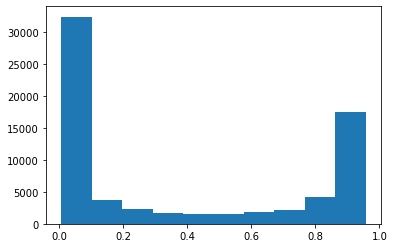

In [189]:
plt.hist(data['sentiment score'])

## Aggregating the data daywise

In [199]:
aggregated=data.groupby(['date']).aggregate({'predicted sentiment':np.sum,'day':np.size,'sentiment score':np.average}).reset_index()

In [204]:
aggregated

,date,+ve Tweets,Total Tweets,Average Sentiment,+ve Tweets ratio,Predicted_sentiment
0,2021-03-05,369,966,0.373269,0.381988,0
1,2021-03-08,325,803,0.385182,0.404732,1
2,2021-03-09,377,856,0.416378,0.440421,1
3,2021-03-10,389,948,0.400061,0.410338,1
4,2021-03-11,370,873,0.402046,0.423826,1
...,...,...,...,...,...,...
76,2021-06-21,253,678,0.369783,0.373156,0
77,2021-06-22,255,659,0.376671,0.386950,0
78,2021-06-23,375,875,0.413874,0.428571,1
79,2021-06-24,389,905,0.418163,0.429834,1


In [201]:
aggregated.rename({'predicted sentiment':'+ve Tweets','day':'Total Tweets','sentiment score':'Average Sentiment'},axis=1,inplace=True)

In [202]:
aggregated['+ve Tweets ratio']=aggregated['+ve Tweets']/aggregated['Total Tweets']

## Sentiment Prediction on the scrapped data using the sentiment score mean

In [203]:
aggregated['Predicted_sentiment']=aggregated['Average Sentiment'].apply(lambda x: 1 if x>data['sentiment score'].mean() else 0)

In [194]:
import matplotlib.pyplot as plt

# Importing the ticker data from Yahoo finance

In [136]:
import yfinance as yf

#define the ticker symbol
tickerSymbol = 'TSLA'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2021-3-5', end='2021-6-30')

#see your data
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-03-05,626.059998,627.840027,539.489990,597.950012,89396500,0,0
2021-03-08,600.549988,620.130005,558.789978,563.000000,51787000,0,0
2021-03-09,608.179993,678.090027,595.210022,673.580017,67523300,0,0
2021-03-10,700.299988,717.849976,655.059998,668.059998,60605700,0,0
2021-03-11,699.400024,702.500000,677.179993,699.599976,36253900,0,0
...,...,...,...,...,...,...,...
2021-06-23,632.000000,657.200012,630.039978,656.570007,31099200,0,0
2021-06-24,674.989990,697.619995,667.609985,679.820007,45982400,0,0
2021-06-25,689.580017,693.809998,668.700012,671.869995,32496700,0,0


In [137]:
tickerDf.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
dtype: object

In [205]:
aggregated_1 = aggregated.set_index('date')

# Merging the TSLA ticker data with our aggregated data

In [206]:
aggregated_2 = aggregated_1.join(tickerDf,how='outer')

In [207]:
aggregated_2.drop(['High','Low','Volume','Dividends','Stock Splits'],axis=1,inplace=True)

In [208]:
aggregated_2.dropna(inplace=True)

In [212]:
aggregated_2

,+ve Tweets,Total Tweets,Average Sentiment,+ve Tweets ratio,Predicted_sentiment,Open,Close,Actual_Market
2021-03-05,369.0,966.0,0.373269,0.381988,0.0,626.059998,597.950012,Negative
2021-03-08,325.0,803.0,0.385182,0.404732,1.0,600.549988,563.000000,Negative
2021-03-09,377.0,856.0,0.416378,0.440421,1.0,608.179993,673.580017,Positive
2021-03-10,389.0,948.0,0.400061,0.410338,1.0,700.299988,668.059998,Negative
2021-03-11,370.0,873.0,0.402046,0.423826,1.0,699.400024,699.599976,Positive
...,...,...,...,...,...,...,...,...
2021-06-21,253.0,678.0,0.369783,0.373156,0.0,624.479980,620.830017,Negative
2021-06-22,255.0,659.0,0.376671,0.386950,0.0,618.250000,623.710022,Positive
2021-06-23,375.0,875.0,0.413874,0.428571,1.0,632.000000,656.570007,Positive
2021-06-24,389.0,905.0,0.418163,0.429834,1.0,674.989990,679.820007,Positive


In [210]:
def f(x):
    if x['Close'] > x['Open']:
        return 'Positive'
    else:
        return 'Negative'
        
aggregated_2['Actual_Market']=aggregated_2.apply(f, axis=1)

In [215]:
aggregated_3 = aggregated_2[['Predicted_sentiment','Actual_Market']]

In [217]:
aggregated_3['Actual_Market'].replace({'Negative':0,'Positive':1},inplace=True)

/Users/sachinsinghal/miniforge3/envs/tf_m1/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [220]:
def f(x):
    if x['Predicted_sentiment'] == x['Actual_Market']:
        return True
    else:
        return False
        
aggregated_3['Match']=aggregated_3.apply(f, axis=1)

<ipython-input-220-5f801247c23a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_3['Match']=aggregated_3.apply(f, axis=1)


# Accuracy of our predicted sentiment with that of our yahoo finance data

In [226]:
accuracy = (aggregated_3['Match'].sum()/aggregated_3['Match'].count())*100
accuracy

54.43037974683544

In [227]:
aggregated_3

,Predicted_sentiment,Actual_Market,Match
2021-03-05,0.0,0,True
2021-03-08,1.0,0,False
2021-03-09,1.0,1,True
2021-03-10,1.0,0,False
2021-03-11,1.0,1,True
...,...,...,...
2021-06-21,0.0,0,True
2021-06-22,0.0,1,False
2021-06-23,1.0,1,True
2021-06-24,1.0,1,True


# RNN

In [236]:
model = keras.Sequential()
# Embedding layer turns vectors of integers into dense real vectors of fixed size
model.add(layers.Embedding(max_features, 16))
model.add(layers.SimpleRNN(32, dropout=0.2, recurrent_dropout=0.2))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = optimizers.RMSprop(learning_rate=0.001)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                1568      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 321,601
Trainable params: 321,601
Non-trainable params: 0
_________________________________________________________________


In [237]:
EPOCHS = 32
BATCH = 64

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

model.fit(X_train_indices, Y_train,
          batch_size=BATCH,
          epochs=EPOCHS,
          validation_split=0.2,
          verbose = 1,
          callbacks = [early_stop])

_, acc = model.evaluate(X_test_indices, Y_test, batch_size=64, verbose = 0)
print("Testing set accuracy: {:.2f}%".format(acc*100))

Epoch 1/32
114/114 [==============================] - 3s 16ms/step - loss: 0.6168 - accuracy: 0.6651 - val_loss: 0.4832 - val_accuracy: 0.8149
Epoch 2/32
114/114 [==============================] - 2s 15ms/step - loss: 0.5130 - accuracy: 0.7987 - val_loss: 0.4791 - val_accuracy: 0.8149
Epoch 3/32
114/114 [==============================] - 2s 13ms/step - loss: 0.5008 - accuracy: 0.8037 - val_loss: 0.4753 - val_accuracy: 0.8149
Epoch 4/32
114/114 [==============================] - 1s 13ms/step - loss: 0.4970 - accuracy: 0.7977 - val_loss: 0.4552 - val_accuracy: 0.8149
Epoch 5/32
114/114 [==============================] - 2s 13ms/step - loss: 0.4956 - accuracy: 0.7949 - val_loss: 0.4490 - val_accuracy: 0.8149
Epoch 6/32
114/114 [==============================] - 1s 13ms/step - loss: 0.4706 - accuracy: 0.8049 - val_loss: 0.4567 - val_accuracy: 0.8149
Epoch 7/32
114/114 [==============================] - 2s 14ms/step - loss: 0.4831 - accuracy: 0.8023 - val_loss: 0.4550 - val_accuracy: 0.8149

# RNN using the entire sequence instead of the last output

In [238]:
model = keras.Sequential()
# Embedding layer turns vectors of integers into dense real vectors of fixed size
model.add(layers.Embedding(max_features, 16, input_length=maxLen))
model.add(layers.SimpleRNN(32, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = optimizers.RMSprop(learning_rate=0.001)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 16)            320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 50, 32)            1568      
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1601      
Total params: 323,169
Trainable params: 323,169
Non-trainable params: 0
_________________________________________________________________


In [239]:
EPOCHS = 32
BATCH = 64

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

model.fit(X_train_indices, Y_train,
          batch_size=BATCH,
          epochs=EPOCHS,
          validation_split=0.2,
          verbose = 1,
          callbacks = [early_stop])

_, acc = model.evaluate(X_test_indices, Y_test, batch_size=64, verbose = 0)
print("Testing set accuracy: {:.2f}%".format(acc*100))

Epoch 1/32
114/114 [==============================] - 2s 14ms/step - loss: 0.5398 - accuracy: 0.7590 - val_loss: 0.3310 - val_accuracy: 0.8628
Epoch 2/32
114/114 [==============================] - 1s 13ms/step - loss: 0.3797 - accuracy: 0.8514 - val_loss: 0.2708 - val_accuracy: 0.8843
Epoch 3/32
114/114 [==============================] - 1s 13ms/step - loss: 0.2896 - accuracy: 0.8828 - val_loss: 0.2288 - val_accuracy: 0.8992
Epoch 4/32
114/114 [==============================] - 1s 12ms/step - loss: 0.2302 - accuracy: 0.9142 - val_loss: 0.2108 - val_accuracy: 0.9124
Epoch 5/32
114/114 [==============================] - 1s 13ms/step - loss: 0.1845 - accuracy: 0.9336 - val_loss: 0.1969 - val_accuracy: 0.9179
Epoch 6/32
114/114 [==============================] - 2s 13ms/step - loss: 0.1506 - accuracy: 0.9426 - val_loss: 0.1935 - val_accuracy: 0.9190
Epoch 7/32
114/114 [==============================] - 2s 14ms/step - loss: 0.1372 - accuracy: 0.9520 - val_loss: 0.1987 - val_accuracy: 0.9229

# Stacked LSTM

In [240]:
model = keras.Sequential()
# Embedding layer turns vectors of integers into dense real vectors of fixed size
model.add(layers.Embedding(max_features, 16))
model.add(layers.LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model.add(layers.LSTM(128, return_sequences=False, dropout=0.2, recurrent_dropout=0.2))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = optimizers.RMSprop(learning_rate=0.001)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 16)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 128)         74240     
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 525,953
Trainable params: 525,953
Non-trainable params: 0
_________________________________________________________________


In [241]:
EPOCHS = 32
BATCH = 64

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

model.fit(X_train_indices, Y_train,
          batch_size=BATCH,
          epochs=EPOCHS,
          validation_split=0.2,
          verbose = 1,
          callbacks = [early_stop])

_, acc = model.evaluate(X_test_indices, Y_test, batch_size=64, verbose = 0)
print("Testing set accuracy: {:.2f}%".format(acc*100))

Epoch 1/32
114/114 [==============================] - 34s 271ms/step - loss: 0.5234 - accuracy: 0.7908 - val_loss: 0.4813 - val_accuracy: 0.8149
Epoch 2/32
114/114 [==============================] - 61s 535ms/step - loss: 0.5069 - accuracy: 0.7974 - val_loss: 0.4788 - val_accuracy: 0.8149
Epoch 3/32
114/114 [==============================] - 71s 622ms/step - loss: 0.4537 - accuracy: 0.8119 - val_loss: 0.2950 - val_accuracy: 0.8882
Epoch 4/32
114/114 [==============================] - 64s 557ms/step - loss: 0.3194 - accuracy: 0.8827 - val_loss: 0.2295 - val_accuracy: 0.9019
Epoch 5/32
114/114 [==============================] - 62s 544ms/step - loss: 0.2610 - accuracy: 0.8946 - val_loss: 0.2282 - val_accuracy: 0.9124
Epoch 6/32
114/114 [==============================] - 66s 575ms/step - loss: 0.2199 - accuracy: 0.9271 - val_loss: 0.2261 - val_accuracy: 0.9063
Epoch 7/32
114/114 [==============================] - 90s 789ms/step - loss: 0.1865 - accuracy: 0.9308 - val_loss: 0.2228 - val_ac

# Bidirectional LSTM

In [242]:
model = keras.Sequential()
# Embedding layer turns vectors of integers into dense real vectors of fixed size
model.add(layers.Embedding(max_features, 16))
model.add(layers.Bidirectional(layers.LSTM(128, return_sequences=False, dropout=0.2, recurrent_dropout=0.2)))
model.add(layers.Dense(1, activation='sigmoid'))

optimizer = optimizers.RMSprop(learning_rate=0.001)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 16)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               148480    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 468,737
Trainable params: 468,737
Non-trainable params: 0
_________________________________________________________________


In [243]:
EPOCHS = 32
BATCH = 64

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

model.fit(X_train_indices, Y_train,
          batch_size=BATCH,
          epochs=EPOCHS,
          validation_split=0.2,
          verbose = 1,
          callbacks = [early_stop])

_, acc = model.evaluate(X_test_indices, Y_test, batch_size=64, verbose = 0)
print("Testing set accuracy: {:.2f}%".format(acc*100))

Epoch 1/32
114/114 [==============================] - 34s 282ms/step - loss: 0.5129 - accuracy: 0.7711 - val_loss: 0.3416 - val_accuracy: 0.8562
Epoch 2/32
114/114 [==============================] - 33s 289ms/step - loss: 0.3107 - accuracy: 0.8687 - val_loss: 0.2295 - val_accuracy: 0.9019
Epoch 3/32
114/114 [==============================] - 51s 445ms/step - loss: 0.2122 - accuracy: 0.9186 - val_loss: 0.2004 - val_accuracy: 0.9190
Epoch 4/32
114/114 [==============================] - 55s 478ms/step - loss: 0.1856 - accuracy: 0.9339 - val_loss: 0.1905 - val_accuracy: 0.9240
Epoch 5/32
114/114 [==============================] - 55s 481ms/step - loss: 0.1479 - accuracy: 0.9445 - val_loss: 0.1904 - val_accuracy: 0.9229
Epoch 6/32
114/114 [==============================] - 62s 544ms/step - loss: 0.1395 - accuracy: 0.9488 - val_loss: 0.1911 - val_accuracy: 0.9207
Epoch 7/32
114/114 [==============================] - 74s 648ms/step - loss: 0.1207 - accuracy: 0.9550 - val_loss: 0.2067 - val_ac